In [29]:
%matplotlib inline

In [50]:
import numpy as np
import nibabel as nb
from vtk_rw import read_vtk, write_vtk
import matplotlib.pyplot as plt
import seaborn as sns

/home/raid3/huntenburg/workspace/anaconda2/envs/myelinconnect/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [31]:
mapping_x='/scr/ilz3/myelinconnect/mappings/rest2groupavg_surf/rest1_1/x/rh_lowres_new_avgsurf_groupdata.vtk'
mapping_y='/scr/ilz3/myelinconnect/mappings/rest2groupavg_surf/rest1_1/y/rh_lowres_new_avgsurf_groupdata.vtk'
mapping_z='/scr/ilz3/myelinconnect/mappings/rest2groupavg_surf/rest1_1/z/rh_lowres_new_avgsurf_groupdata.vtk'
rest1_1_BP4T='/scr/ilz3/myelinconnect/resting/final/BP4T_rest1_1_denoised.nii.gz'

In [32]:
rest=nb.load(rest1_1_BP4T)
rest_vol=rest.get_data()

In [33]:
v, f, dx = read_vtk(mapping_x)
_, _, dy = read_vtk(mapping_y)
_, _, dz = read_vtk(mapping_z) 

In [34]:
coords = np.vstack((dx[:,0],dy[:,0],dz[:,0]))
coords = coords.T

In [45]:
rest_mesh = np.zeros((v.shape[0], rest_vol.shape[-1]))

In [46]:
test_vol = np.zeros((rest_vol.shape[0:3]))

In [47]:
for vertex in range(rest_mesh.shape[0]):
    if np.all(coords[vertex]==0):
        pass
    else:
        coord = np.asarray(np.round(coords[vertex]), 'int64')
        rest_mesh[vertex] = rest_vol[coord[0], coord[1], coord[2]]
        test_vol[coord[0], coord[1], coord[2]] = 1

In [48]:
test_vol.shape

(128, 128, 70)

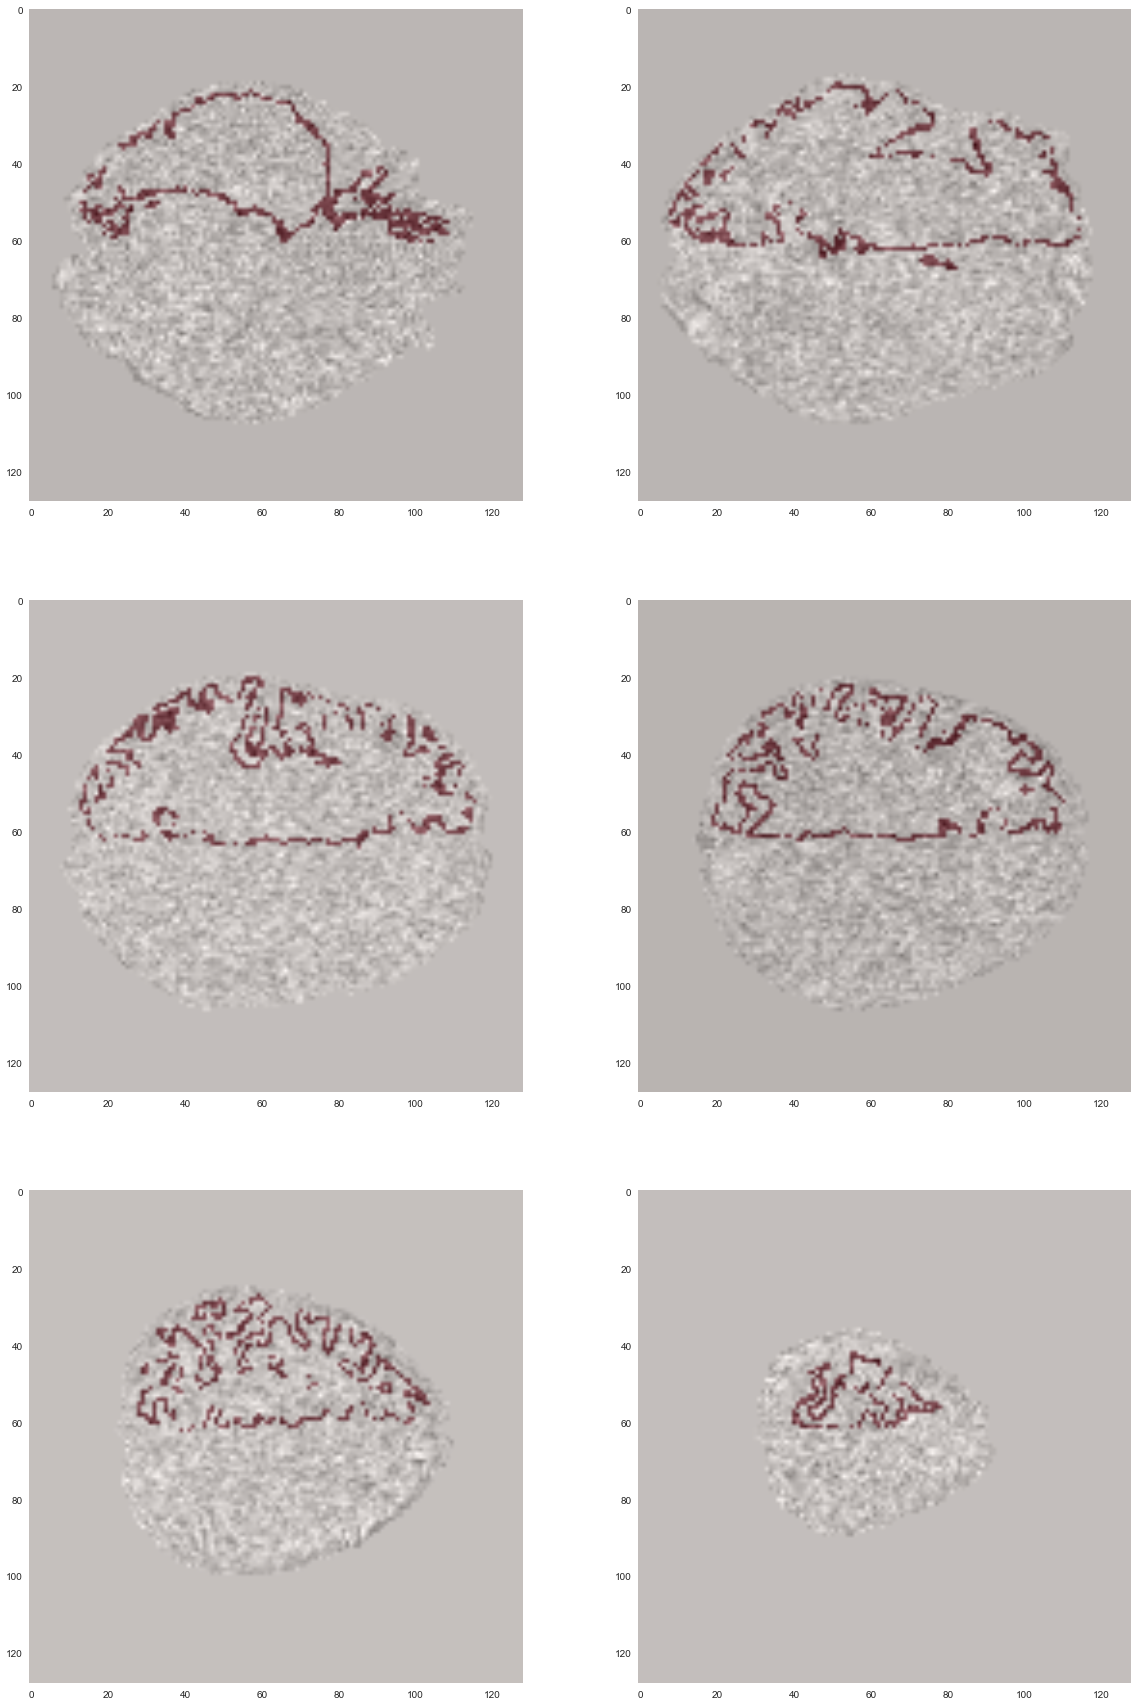

In [52]:
s=[10,20,30,40,50,60]
sns.set_style('dark')
fig = plt.figure(figsize=(20,30))
for i in range(len(s)):
    fig.add_subplot(3,2,i+1)
    plt.imshow(rest_vol[:,:,s[i], 100], cmap='gray')
    plt.imshow(test_vol[:,:,s[i]], cmap='Reds', alpha=0.5)